In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [3]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [4]:
Model_1 = GradientBoostingRegressor()

# 2. Setup Pipeline

In [5]:

RG = Model_1

In [6]:

pipe = Pipeline(steps=[("RG",RG)])

In [7]:
param_grid = {
    "RG__learning_rate":[0.005,0.1,0.5,1,10],
    "RG__n_estimators":[10,100],
    "RG__min_samples_split":[0.01*i for i in range(1,3)],
    "RG__ccp_alpha":[0.005,0.1,0.5,10]
    
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train.values.ravel())

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RG', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__learning_rate': [0.005, 0.1, 0.5, 1, 10],
                         'RG__min_samples_split': [0.01, 0.02],
                         'RG__n_estimators': [10, 100]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-519.093):
{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 0.5, 'RG__min_samples_split': 0.02, 'RG__n_estimators': 100}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__learning_rate,param_RG__min_samples_split,param_RG__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
31,1.026923,0.138288,0.002958,0.004879,0.1,0.5,0.02,100,"{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 0....",-1.818502e+02,...,-4.460117e+02,-8.433489e+02,-2.133747e+02,-5.346240e+02,-4.230545e+02,-6.334373e+02,-2.345782e+02,-5.190927e+02,356.539833,1
11,0.877951,0.037784,0.004686,0.007159,0.005,0.5,0.02,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-1.722996e+02,...,-4.436743e+02,-8.249443e+02,-2.118729e+02,-5.459485e+02,-4.213238e+02,-6.357713e+02,-2.336413e+02,-5.263804e+02,388.439765,2
51,1.001477,0.126939,0.004557,0.004202,0.5,0.5,0.02,100,"{'RG__ccp_alpha': 0.5, 'RG__learning_rate': 0....",-2.074087e+02,...,-4.783307e+02,-1.146763e+03,-1.544513e+02,-5.478472e+02,-4.315470e+02,-7.187497e+02,-2.403109e+02,-5.634755e+02,401.437496,3
47,0.950107,0.093156,0.002260,0.004667,0.5,0.1,0.02,100,"{'RG__ccp_alpha': 0.5, 'RG__learning_rate': 0....",-1.782078e+02,...,-4.759029e+02,-9.821374e+02,-2.056012e+02,-6.709349e+02,-4.000857e+02,-7.122550e+02,-2.573928e+02,-5.723434e+02,420.958609,4
27,0.956659,0.063163,0.002294,0.001947,0.1,0.1,0.02,100,"{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 0....",-1.796140e+02,...,-4.719039e+02,-9.822286e+02,-1.890067e+02,-6.766918e+02,-3.950785e+02,-7.063319e+02,-2.516377e+02,-5.760216e+02,441.711975,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.895917,0.022802,0.001961,0.004706,0.005,10,0.01,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-2.747432e+193,...,-1.023351e+194,-5.637643e+193,-2.730949e+193,-1.778593e+194,-3.003149e+193,-2.990801e+193,-3.747398e+193,-6.572824e+193,inf,75
79,0.829307,0.041572,0.001861,0.004672,10,10,0.02,100,"{'RG__ccp_alpha': 10, 'RG__learning_rate': 10,...",-3.770349e+193,...,-1.023351e+194,-7.666040e+193,-2.730949e+193,-1.773245e+194,-4.026377e+193,-4.015652e+193,-6.901978e+193,-6.948134e+193,inf,77
19,0.888110,0.028497,0.002655,0.004627,0.005,10,0.02,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-3.770349e+193,...,-1.023351e+194,-7.666040e+193,-2.730949e+193,-1.778593e+194,-4.026377e+193,-4.015652e+193,-6.901978e+193,-6.953483e+193,inf,78
39,1.031734,0.150824,0.005588,0.006669,0.1,10,0.02,100,"{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 10...",-3.770349e+193,...,-1.023351e+194,-7.666040e+193,-2.730949e+193,-1.778593e+194,-4.026377e+193,-4.015652e+193,-6.901978e+193,-6.953483e+193,inf,79


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 0.5, 'RG__min_samples_split': 0.02, 'RG__n_estimators': 100}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_lr = parms.iloc[0][0]['RG__learning_rate']
best_n_est = parms.iloc[0][0]['RG__n_estimators']
best_min_ss=parms.iloc[0][0]['RG__min_samples_split']
best_ccp_alpha=parms.iloc[0][0]['RG__ccp_alpha']
#best_pca=170
#best_lr=0.1
#best_n_est=100

In [14]:
Model_2 = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

GradientBoostingRegressor(ccp_alpha=0.1, learning_rate=0.5,
                          min_samples_split=0.02)

In [17]:
MSE(RG1.predict(X_test1),Y_test1)

296.4777795754036

In [18]:
result = pd.DataFrame(Y_test1)

In [19]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [20]:
MSE(result["sales"],result["Predicted_sales"])

296.4777795754036

# 6. Inventory Decision

In [21]:
residual = result['sales']-result['Predicted_sales']

In [22]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [23]:
import scipy.stats as sct

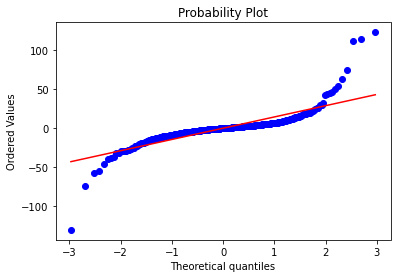

In [24]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [25]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

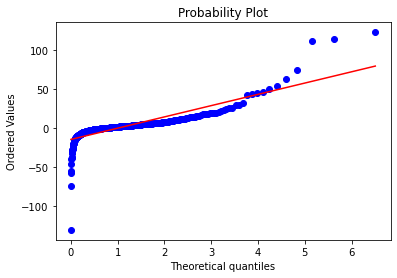

In [26]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [27]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

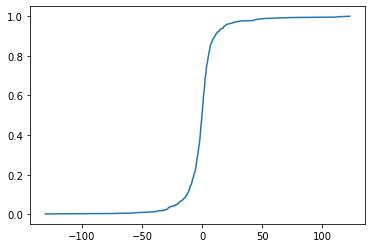

In [28]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

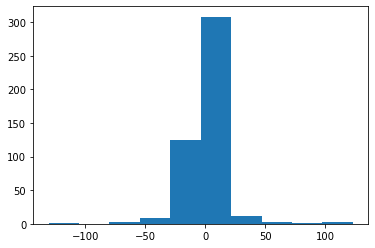

In [29]:
plt.hist(Sample)
plt.show()

In [30]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [31]:
offset = inv(Sample,jumps,2/3)
offset

2.286148601651783

In [32]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [33]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [34]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [35]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

55252.0

In [36]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

58012.0

In [37]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

58500.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [38]:
Model_4= GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [39]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [40]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.683356,0.703642,0.607655,0.693219,0.681708,0.663696,0.692861,0.676930,0.667144,0.671917,0.674213
Exponential,0.725884,0.739615,0.648436,0.730386,0.716035,0.714608,0.725127,0.700781,0.708304,0.729831,0.713901
Empirical,0.734873,0.738200,0.653361,0.731760,0.707575,0.721573,0.727741,0.707285,0.715372,0.731368,0.716911


In [41]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,28280.0,31844.0,28132.0,32304.0,33840.0,25916.0,33928.0,31220.0,29824.0,27984.0,30327.2,2579.214020
Exponential,30040.0,33472.0,30020.0,34036.0,35544.0,27904.0,35508.0,32320.0,31664.0,30396.0,32090.4,2417.099220
Empirical,30412.0,33408.0,30248.0,34100.0,35124.0,28176.0,35636.0,32620.0,31980.0,30460.0,32216.4,2277.601159
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [42]:
profit_table.to_csv(".\\Model_Selection_Result\\4.3B_Gradient_boosting(No_PCA).csv")

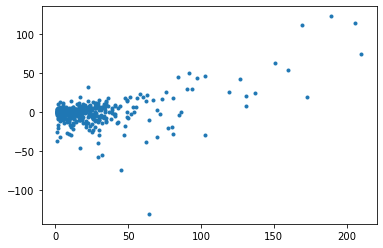

In [43]:
plt.plot(result['sales'],residual,".")